In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

ANALIZA PODATKOV O OGLASIH ZA DELO NA E-ŠTUDENTSKEM SERVISU

Uvod v programiranje, seminarska naloga, 28.8.2025
Ana Raspet

V nadaljevanju sledi analiza podatkov o oglasih za delo ki so trenutn na voljo na e-študentskem servisu. Podatki so bili pridobljeni iz spletne strani e-študentski servis, ki je dostopna na: https://www.studentski-servis.com. 

PODATKI:
Podatki ki so uporabljeni v tem poročilu so na voljo vsem uporabnikom spletne strani e-študentski servis,  brez potrebne registracije ali prijave na samem portalu. Podatke sem s pomočjo orodji in knjižnic, ki so na voljo v programskem jeziku python upsešno izluščila iz same html kode spletne strani e-študentski servis. Podatke sem, po tem ko sem jih uzpešno izluščila iz same kode, še dodatno uredila in jih shranila tako v .json kot tudi .csv datoteki, ki sta pripravljeni za nadaljno obdelavo in analizo. Podatki ki jih lahko najdemo v .json in .csv datotekah ki imata obe naslov podatki_dela so sledeči:
    PODATKI: 
        - VRSTA DELA: Podatek o tem za kakšno vrsto dela gre. ta podatek ima omejeno število kategorij. posamezna kategorija se pojavi pri več različnih oglasih, in omogoča grupiranje oglasoh po posamezni kategoriji.
        - NASLOV OGLASA: nekoliko bolj podrobna definicija dela pri posameznem oglasu. Precej več različnih možnosti kot pri vrsti dela. Tukaj predvidevam da naročnik ni omejen z nekim fiksnim naborom možnosti kot na primer pri vrsti dela ampak je lahko naslov oglasa kar koli.
        - KRAJ: določa v katerm kraju oz. regiji se bo delo na ogalsu izvajalo
        - PLAČILO: določa neto znesek višine plačila. Tukaj sem ohranila le neto vrednost, saj se mi zdi za študente bolj zanimiv podatek saj nam pove točen znesek ki ga bo študent prejel na svoj račun za eno uro opravljenega dela.
        - PROSTA MESTA: določa koliko prstih delovnih mest ima določen oglas. 
        - TRAJANJE: določa kako dolgo se bo določeno delo na ogalsu izvajalo. tukaj imamo tako kot pri vrsti dela omejen nabor možnosti ki jih naročnik oglasa lahko izbere
        - DELOVNIK: določa kakšen delovnih posamezne oglas zahteve: popoldan, dopoldan,...Tudi tukaj imamo omejen nabor možnosti
        - ZAČETEK DELA: datumsko določa kdaj se bo delo na posameznemu ogalsu pričelo izvajati.

V nadaljevanju sem poizkušala podatke analizirati na kar se da zanimiv in izviren način. rezultet sem nato prikazala s pomočjo različnih tabel in vizualizacij tako da so ugotovitve hitro in jasno vidne na samih vizualizacijah. 

1: POVPREČNO PLAČILO PO VRSTI DELA

Prvo kar me je zanimalo pri mojih podatkih je bilo seveda to kje in kako lahko kot študentka največ zaslužim. Odločila sem se da preverim katera vrsta dela je najbolje plačana in v kateri regiji je takih del največ. Poleg tega me je zanimalo tudi v kateri regiji oziroma kraju je povprečno plačilo najvišje in ali se bom za boljši zaslužek morda morala preseliti na drugo stran države. 

Na spodnji vizualizaciji sem najprej predstavila posamezne vrste dela razvrščene glede na višino plačila. To sem storila tako da sem podatke v moji .csv datoteki najprej grupirala glede na vrsto dela, nato pa za vsako grupo posebej izračunala povprečno višino plačila v tej grupi. Rezultati so prikazani na grafu spodaja ki je urejen padajoče glede na višino plačila. Kot lahko vidimo iz podatkov lahko precej zaslužimo z deli kot so statist, trener, vodja, maskota,... Definitivno pa se nam ne splača nakladati in razkladati različnih predmetov.

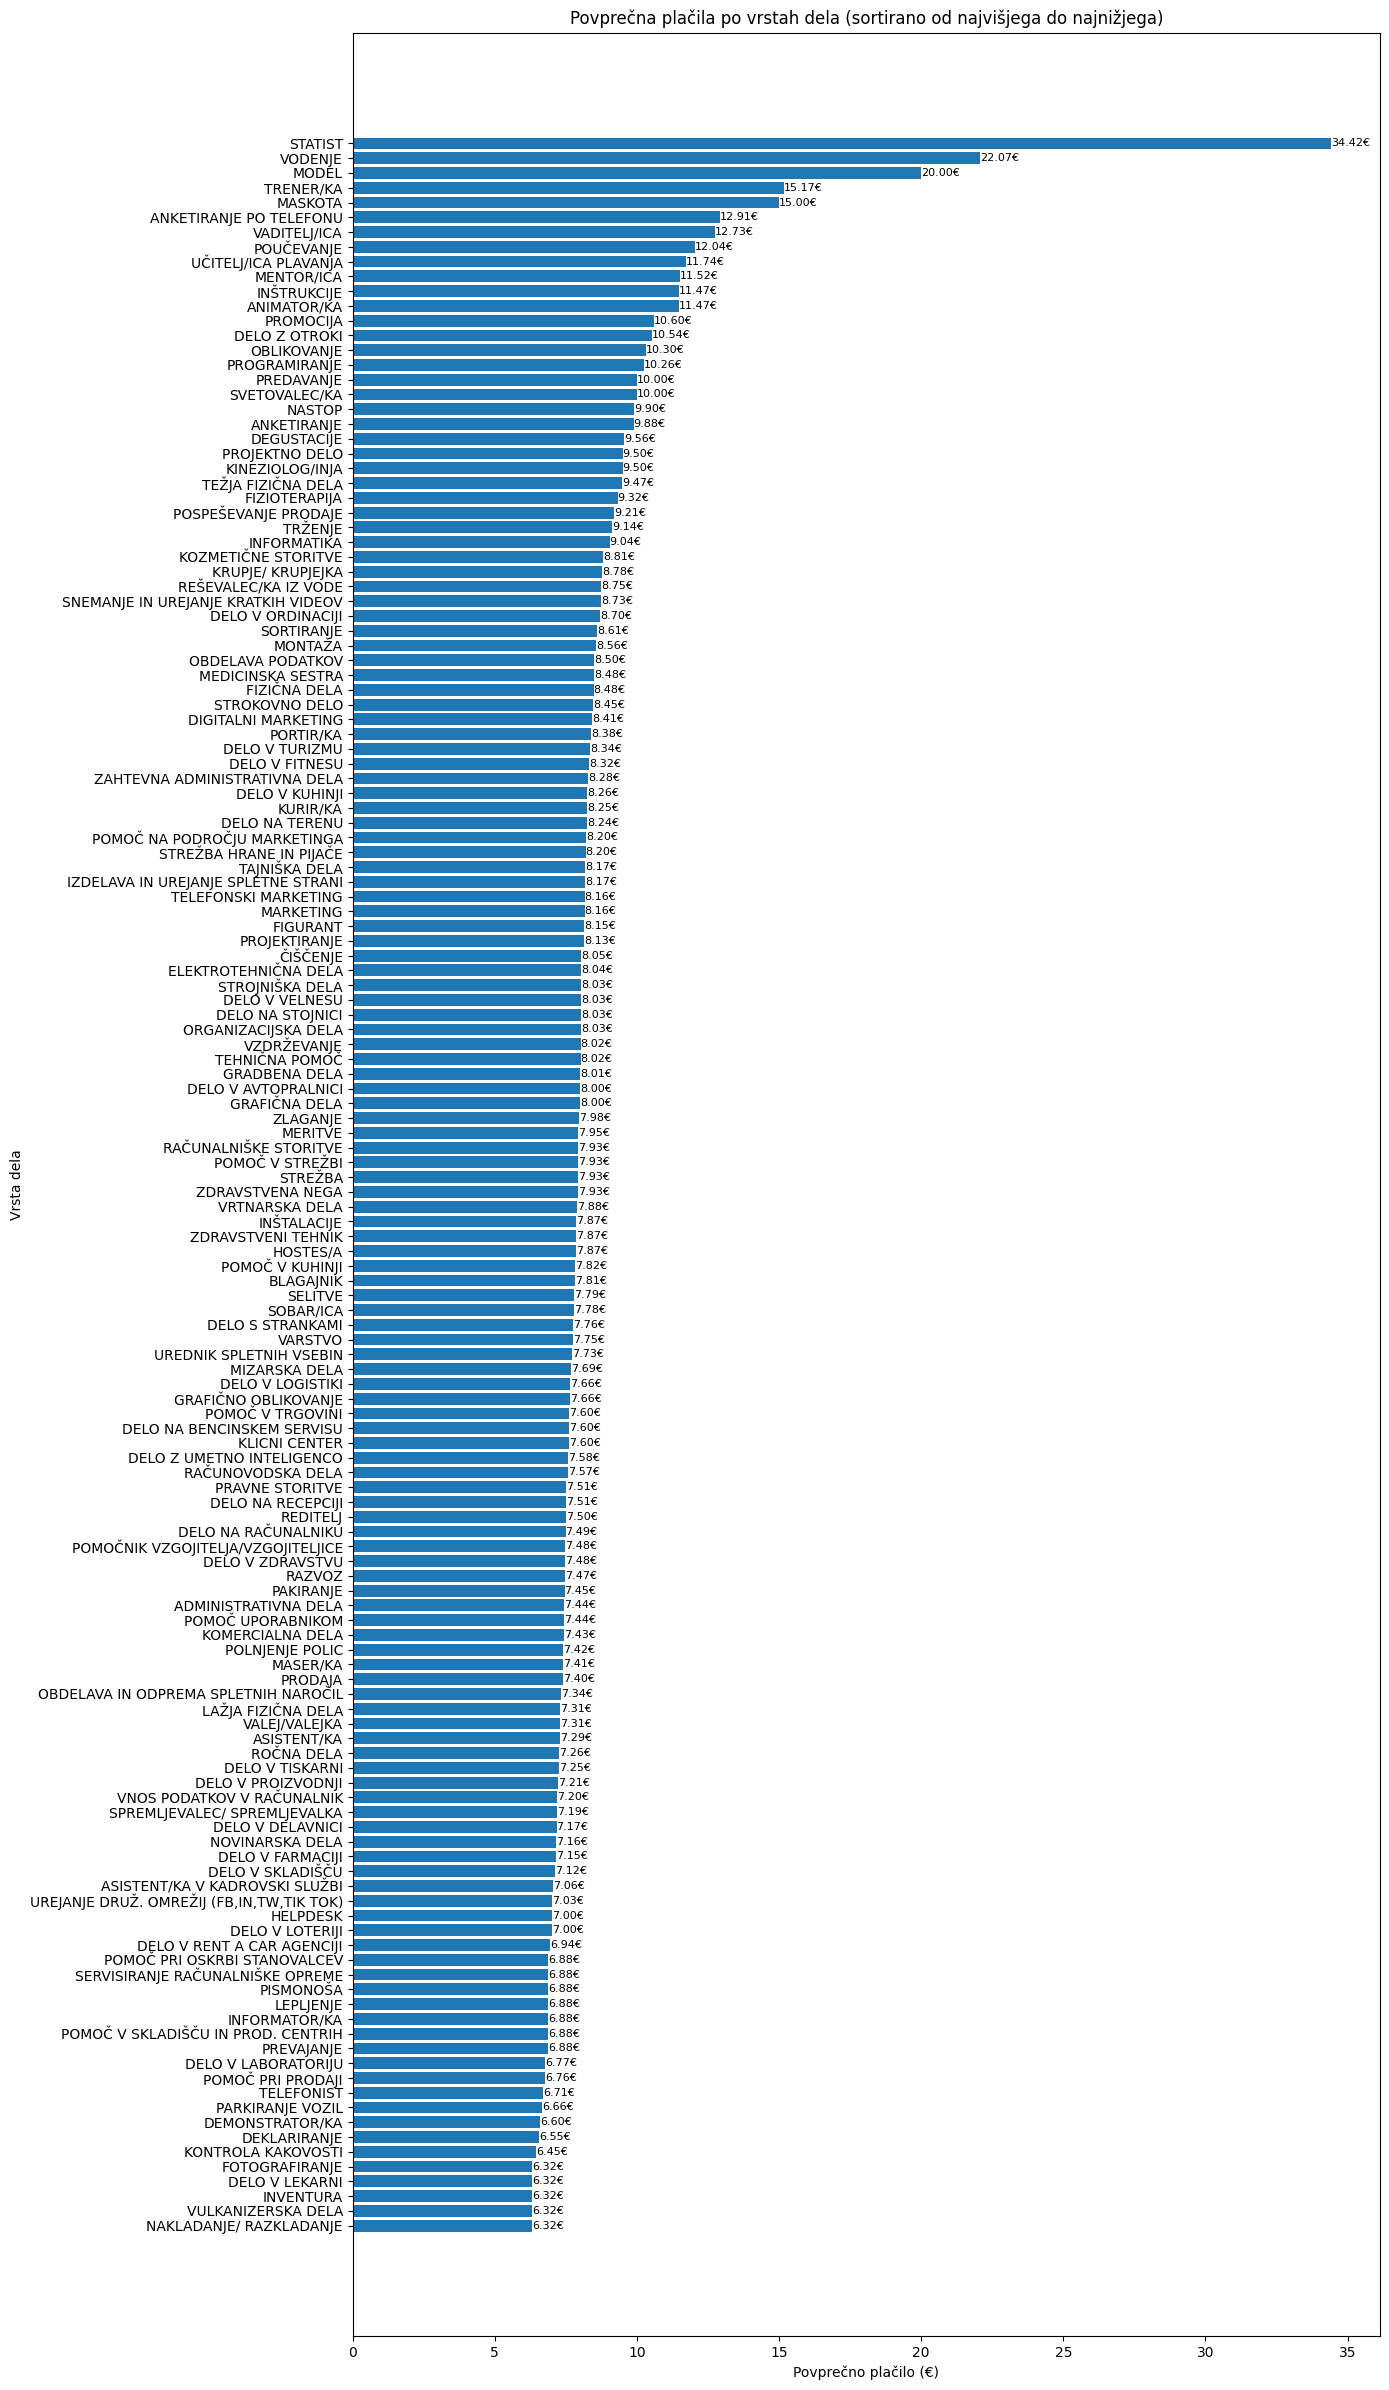

In [33]:

# Branje podatkov iz CSV datoteke
df = pd.read_csv('podatki_dela.csv')

df['Placilo'] = pd.to_numeric(df['Placilo'])

# Grupiranje podatkov po Vrsta dela in izračun povprečne vrednosti plačila
povprecna_placila = df.groupby('Vrsta dela')['Placilo'].mean()

# Sortiranje od največjega do najmanjšega plačila
povprecna_placila_sorted = povprecna_placila.sort_values(ascending=True)

# Ustvarjanje grafa
plt.figure(figsize=(14, 24))
plt.barh(range(len(povprecna_placila_sorted)), povprecna_placila_sorted.values)

# Nastavitve grafa
plt.yticks(range(len(povprecna_placila_sorted)), povprecna_placila_sorted.index)
plt.xlabel('Povprečno plačilo (€)')
plt.ylabel('Vrsta dela')
plt.title('Povprečna plačila po vrstah dela (sortirano od najvišjega do najnižjega)')

# Dodajanje vrednosti na stolpce
for i, value in enumerate(povprecna_placila_sorted.values):
    plt.text(value, i, f'{value:.2f}€', 
             va='center', fontsize=8)

# Prilagoditev razmikov
plt.tight_layout()

# Prikaz grafa
plt.show()